## 1. Import Library

In [8]:
!pip install haversine
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

## 2. Load Dataset

In [9]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['beach-water-and-weather-sensor-locations-1.csv']))
data

Saving beach-water-and-weather-sensor-locations-1.csv to beach-water-and-weather-sensor-locations-1.csv


,index,Sensor Name,Sensor Type,Latitude,Longitude,Location
0,0,Calumet Beach,Water,41.714739,-87.527356,"(41.714739000000002, -87.527355999999997)"
1,1,63rd Street Weather Station,Weather,41.780992,-87.572619,"(41.780991999999998, -87.572619000000003)"
2,2,63rd Street Beach,Water,41.784561,-87.571453,"(41.784560999999997, -87.571453000000005)"
3,3,Oak Street Weather Station,Weather,41.901997,-87.622817,"(41.901997000000001, -87.622816999999998)"
4,4,Foster Weather Station,Weather,41.976464,-87.647525,"(41.976464, -87.647525000000002)"
5,5,Montrose Beach,Water,41.969094,-87.638003,"(41.969093999999998, -87.638002999999998)"
6,6,Osterman Beach,Water,41.987675,-87.651008,"(41.987675000000003, -87.651008000000004)"
7,7,Ohio Street Beach,Water,41.894328,-87.613083,"(41.894328000000002, -87.613083000000003)"
8,8,Rainbow Beach,Water,41.760147,-87.550081,"(41.760147000000003, -87.550081000000006)"


## 3. DBSCAN Clustering (menggunakan Haversine distance)

In [10]:
coords = data[['Latitude', 'Longitude']].to_numpy()

# Konversi jarak eps ke radian
kms_per_radian = 6371.0088
eps_km = 2   # radius 2 km, bisa disesuaikan
epsilon = eps_km / kms_per_radian

db = DBSCAN(
    eps=epsilon,
    min_samples=2,
    metric='haversine'
).fit(np.radians(coords))

data['Cluster'] = db.labels_
data

,index,Sensor Name,Sensor Type,Latitude,Longitude,Location,Cluster
0,0,Calumet Beach,Water,41.714739,-87.527356,"(41.714739000000002, -87.527355999999997)",-1
1,1,63rd Street Weather Station,Weather,41.780992,-87.572619,"(41.780991999999998, -87.572619000000003)",0
2,2,63rd Street Beach,Water,41.784561,-87.571453,"(41.784560999999997, -87.571453000000005)",0
3,3,Oak Street Weather Station,Weather,41.901997,-87.622817,"(41.901997000000001, -87.622816999999998)",1
4,4,Foster Weather Station,Weather,41.976464,-87.647525,"(41.976464, -87.647525000000002)",2
5,5,Montrose Beach,Water,41.969094,-87.638003,"(41.969093999999998, -87.638002999999998)",2
6,6,Osterman Beach,Water,41.987675,-87.651008,"(41.987675000000003, -87.651008000000004)",2
7,7,Ohio Street Beach,Water,41.894328,-87.613083,"(41.894328000000002, -87.613083000000003)",1
8,8,Rainbow Beach,Water,41.760147,-87.550081,"(41.760147000000003, -87.550081000000006)",-1


## 4. Visualisasi Clustering

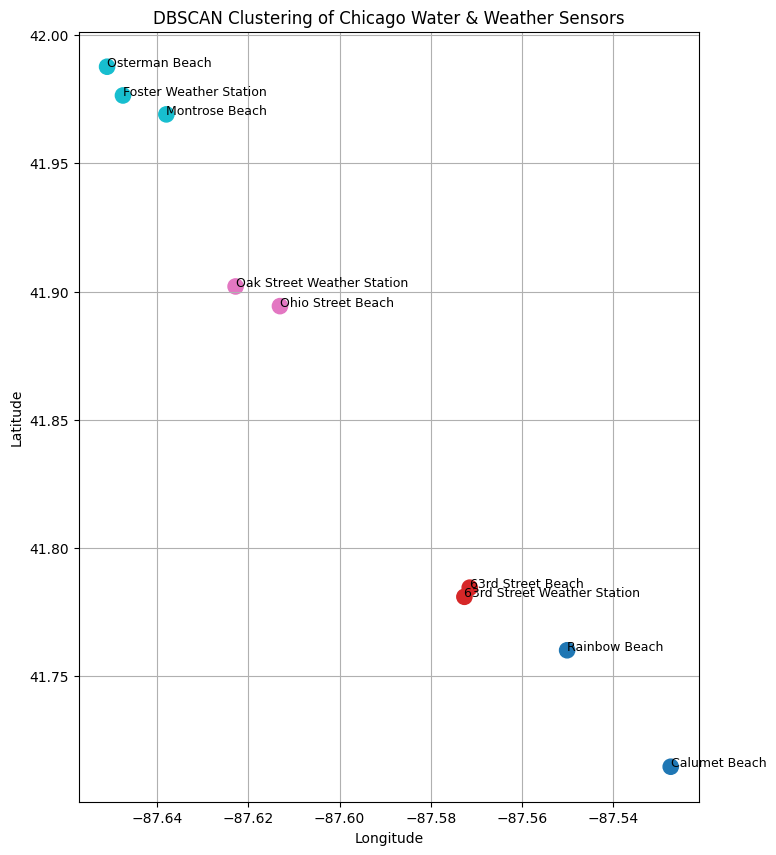

In [11]:
plt.figure(figsize=(8, 10))
plt.scatter(
    data['Longitude'], data['Latitude'],
    c=data['Cluster'], cmap='tab10', s=120
)

# Tampilkan label sensor
for i in range(len(data)):
    plt.text(
        data['Longitude'][i],
        data['Latitude'][i],
        data['Sensor Name'][i],
        fontsize=9
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pengelompokan DBSCAN pada Sensor Air dan Cuaca di Chicago")
plt.grid(True)
plt.show()

## 5. Interpretasi Otomatis

In [12]:
clusters = data['Cluster'].unique()
print(f"Jumlah cluster ditemukan: {len(clusters) - (1 if -1 in clusters else 0)}")
print("\nDetail per cluster:\n")

for c in clusters:
    if c == -1:
        print("Cluster -1 (Noise):")
    else:
        print(f"Cluster {c}:")

    print(data[data['Cluster'] == c][['Sensor Name', 'Latitude', 'Longitude']])
    print()

Jumlah cluster ditemukan: 3

Detail per cluster:

Cluster -1 (Noise):
     Sensor Name   Latitude  Longitude
0  Calumet Beach  41.714739 -87.527356
8  Rainbow Beach  41.760147 -87.550081

Cluster 0:
                   Sensor Name   Latitude  Longitude
1  63rd Street Weather Station  41.780992 -87.572619
2            63rd Street Beach  41.784561 -87.571453

Cluster 1:
                  Sensor Name   Latitude  Longitude
3  Oak Street Weather Station  41.901997 -87.622817
7           Ohio Street Beach  41.894328 -87.613083

Cluster 2:
              Sensor Name   Latitude  Longitude
4  Foster Weather Station  41.976464 -87.647525
5          Montrose Beach  41.969094 -87.638003
6          Osterman Beach  41.987675 -87.651008



# Interpretasi Hasil DBSCAN Clustering (Chicago Water & Weather Sensors)

Dengan parameter:

eps = 2 km

min_samples = 2

metric = Haversine

DBSCAN menemukan 3 cluster dan 2 titik yang dianggap noise.

## 1. Noise / Outlier (Cluster -1)

DBSCAN mengidentifikasi bahwa dua sensor ini tidak memiliki tetangga cukup dekat dalam radius 2 km:
```
Sensor          Lokasi	                            Keterangan
Calumet Beach	Selatan Chicago	                    Terletak sangat jauh dari pantai lain → terisolasi
Rainbow Beach	Chicago South (lebih ke pusat)	    Jarak > 2 km dari 63rd Street Beach → tidak cukup rapat
```
**Alasan menjadi noise:**

Keduanya berada di area selatan yang lokasi pantainya jarang dan berjarak cukup jauh satu sama lain, sehingga tidak memenuhi densitas DBSCAN.

## 2. Cluster 0 – South Chicago (Dekat 63rd Street)
**Sensor**

---

> 63rd Street Weather Station

> 63rd Street Beach

**Interpretasi:**

Sensor-sensor ini berada dalam jarak < 1 km dan merepresentasikan daerah pantai 63rd Street.
Ini membentuk cluster yang kuat (dense region).

## 3. Cluster 1 – Central Chicago Beaches (Downtown area)
**Sensor**

---

> Oak Street Weather Station

> Ohio Street Beach

**Interpretasi:**

Kedua sensor ini berada di area downtown Chicago, yang pantainya saling dekat (<1 km).
Ini membentuk cluster tersendiri di area pusat kota.

## 4. Cluster 2 – North Chicago Beaches
**Sensor**

---

> Foster Weather Station

> Montrose Beach

> Osterman Beach


**Interpretasi:**

Ketiga sensor ini berada di wilayah Chicago Utara, yang memang pantainya saling berdekatan secara fisik.
Cluster ini menjadi cluster terbesar dan paling jelas densitasnya.

# Kesimpulan

1. DBSCAN berhasil mengelompokkan sensor berdasarkan kedekatan geografis, meskipun jumlah cluster tidak ditentukan di awal.

2. Sistem pantai Chicago ternyata membentuk tiga zona geografis:
    * South → 63rd area
    * Central → downtown beaches
    * North → Montrose/Foster/Osterman

3. Sensor yang posisinya terlalu berjauhan (Calumet dan Rainbow) menjadi noise, karena tidak memenuhi kriteria densitas.

4. Dengan menggunakan Haversine distance, perhitungan jarak GPS menjadi akurat untuk clustering spasial.

# Menyimpan model DBSCAN

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

save_path = "/content/drive/MyDrive/praktikum_ml/praktikum11/model"
os.makedirs(save_path, exist_ok=True)

In [ ]:
import joblib

model_path = "/content/drive/MyDrive/praktikum_ml/praktikum11/model/dbscan_model.pkl"
joblib.dump(db, model_path)

print("Model saved to:", model_path)